In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#try %matplotlib notebook as well and see the diff

In [9]:
sns.set(style='ticks') # to remove gridlines
players_df = pd.read_csv('fifa19_data.csv')
print('File loaded!')

File loaded!


In [10]:
#no need to take all columns
categoric_cols = ['Name', 'Club', 'Nationality',
                  'Preferred Foot','Position', 'Body Type']

numeric_cols = ['Overall', 'Potential', 'Crossing', 'Finishing', 'ShortPassing',
               'Dribbling', 'LongPassing', 'BallControl', 'Acceleration',
               'SprintSpeed', 'Agility', 'Stamina', 'Value', 'Wage']

players_df = players_df[categoric_cols+numeric_cols]
players_df.head()

,Name,Club,Nationality,Preferred Foot,Position,Body Type,Overall,Potential,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,Value,Wage
0,L. Messi,FC Barcelona,Argentina,Left,RF,Messi,94,94,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,€110.5M,€565K
1,Cristiano Ronaldo,Juventus,Portugal,Right,ST,C. Ronaldo,94,94,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,€77M,€405K
2,Neymar Jr,Paris Saint-Germain,Brazil,Right,LW,Neymar,92,93,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,€118.5M,€290K
3,De Gea,Manchester United,Spain,Right,GK,Lean,91,93,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,€72M,€260K
4,K. De Bruyne,Manchester City,Belgium,Right,RCM,Normal,91,92,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,€102M,€355K


Alternative approach to select only the required columns while loading the original file itself:

In [11]:
players_df = pd.read_csv('fifa19_data.csv', usecols=categoric_cols+numeric_cols)
print('File with specified columns loaded!')
players_df.head()

File with specified columns loaded!


,Name,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Body Type,Position,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina
0,L. Messi,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,Messi,RF,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0
1,Cristiano Ronaldo,Portugal,94,94,Juventus,€77M,€405K,Right,C. Ronaldo,ST,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0
2,Neymar Jr,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,Neymar,LW,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0
3,De Gea,Spain,91,93,Manchester United,€72M,€260K,Right,Lean,GK,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0
4,K. De Bruyne,Belgium,91,92,Manchester City,€102M,€355K,Right,Normal,RCM,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0


We also have to deal with wage and value columns since they are not in numeric format but in string-type format.

In [12]:
'€565K'.split('K')[0][1:]

'565'

In [14]:
def wage_convert(wage):
    try:
        return(int(wage.split('K')[0][1:])) # returns the left side of K, omitting the first element (Here €) 
    except:
        return 0
players_df['Wage'] = players_df['Wage'].apply(lambda wage: wage_convert(wage))
players_df['Wage'].head()        

0    565
1    405
2    290
3    260
4    355
Name: Wage, dtype: int64

In [15]:
def value_convert(value):
    try:
        if 'M' in value:
            return(float(value.split('M')[0][1:]))
        elif 'K' in value:
            return(float(value.split('K')[0][1:])/1000) # to standardize the metric
    
    except:
        return 0
    
players_df['Value'] = players_df['Value'].apply(lambda value: value_convert(value))
players_df['Value'].head()

0    110.5
1     77.0
2    118.5
3     72.0
4    102.0
Name: Value, dtype: float64

Finding Correlation using pandas and visualizing using seaborn

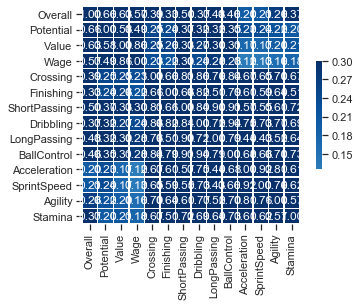

In [20]:
corr = players_df.corr()
corr_matrix = sns.heatmap(corr, vmax = 0.3, center=0, linewidths=0.5, cbar_kws={'shrink':0.5}, square=True, annot=True, fmt='.2f', cmap='Blues')

Here we can observe that the categorical variables have been automatically omitted, thus we are facing information loss.

Correlation between numerical values is simpler, i.e. by using Pearson's Correlation.
For categorical-categorical cases, Cramer's V is used for variables having two or more levels. It is the intercorrelation of two discrete variables and may be used with variables having two or more levels. φc is a symmetrical measure, it does not matter which variable we place in the columns and which in the rows. Also, the order of rows/columns doesn't matter, so φc may be used with nominal data types or higher (notably ordered or numerical).

Cramér's V (sometimes referred to as Cramér's phi and denoted as φc) is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). [Wikipedia] 

In short, range φc is [0,1] and if no "information" gained, φc=0.

If all clubs have the same proportion of players from every nationality, Cramer’s V is 0.
If Every club prefers a single nationality Cramer’s V ==1, for example, all England player play in Manchester United, All Germans in Bayern Munchen and so on.


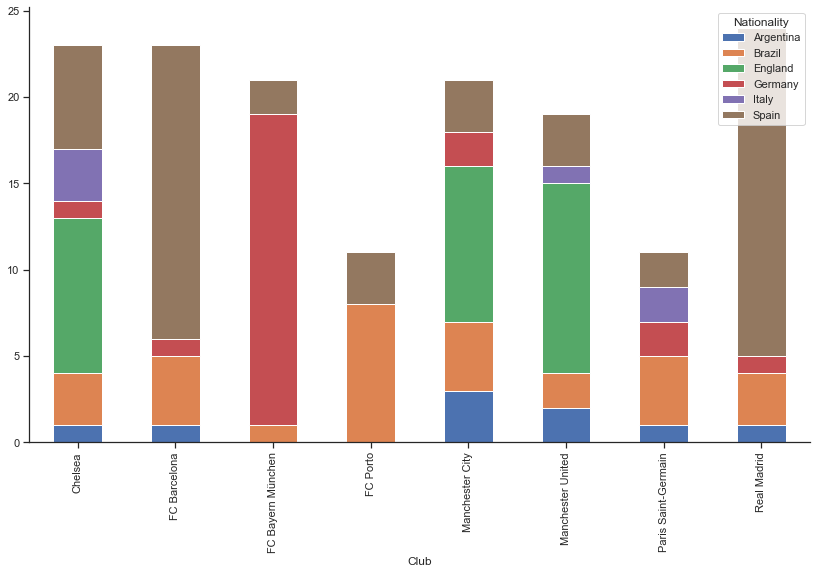

In [21]:
sns.set(style="ticks")

filtered_player_df = players_df[(players_df['Club'].isin(['FC Barcelona', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid','FC Porto','FC Bayern München'])) & 
                      (players_df['Nationality'].isin(['England', 'Brazil', 'Argentina',
       'Brazil', 'Italy','Spain','Germany'])) 
                     ]

df_plot = filtered_player_df.groupby(['Club', 'Nationality']).size().reset_index().pivot(columns='Club', index='Nationality', values=0).reset_index()

g_plot = df_plot.set_index('Nationality').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g_plot.figure.set_size_inches(14,8)
    
plt.show()